In [1]:
from gridSearch.gridSearch import *
# from gridSearch.skygrid import *

In [4]:
# load skygrid

phi, theta = np.load('sphericalGrids/1deg_uniform_skygrid.npy')

square_deg_per_point = 41253 / len(phi)

cx = np.sin(theta) * np.cos(phi)
cy = np.sin( theta ) * np.sin( phi )
cz = np.cos( theta )

coords = np.array([cx, cy, cz])


FileNotFoundError: [Errno 2] No such file or directory: 'sphericalGrids/1deg_uniform_skygrid.npy'

In [606]:
# set satellite & GRB params

sat_xyz = np.array([ 
                    # [0, 6371, 0],
                    # [0, 6371, 0],
                    [-6371, 0, 0],
                    [0, -6371, 0]
])

sat_pointing_coords = np.array([ 
                            # [np.pi, np.pi/2],
                            # [np.pi + 0.3, np.pi/2 - 0.2],
                            [np.pi/2 - 0.3, np.pi - 0.2],
                            [np.pi/2 + 0.3, np.pi + 0.3]
                          ])


sat_pointings = np.array([s2c(*sat_pointing_coords[i]) for i in range(len(sat_pointing_coords))])

grb_coords = np.pi/2 + 0.6, np.pi + 1 # theta, phi
grb_vector = s2c(*grb_coords)
grb_flux = 1000



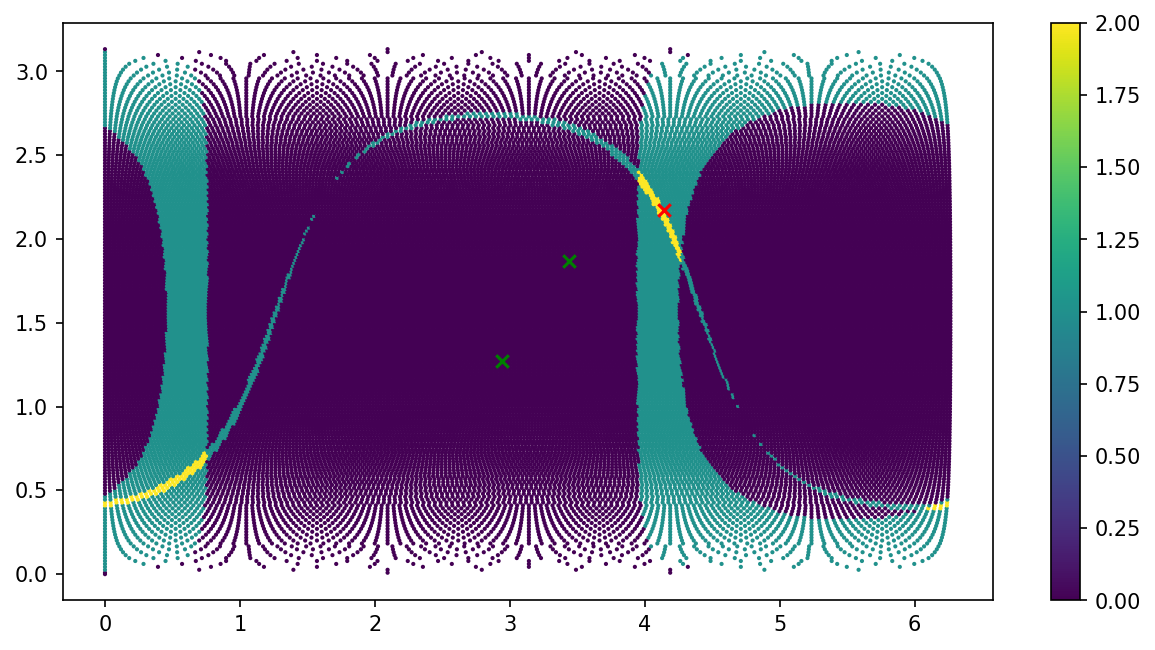

In [609]:
# Demonstrate both methods working side by side (no FOV)

c0 = logLike_timeDifference(sat_xyz, grb_vector)
c0 = (c0 - np.amin(c0) < 2.3).astype('int')

c1 = logLike_fluxRatio(sat_pointings, grb_vector, grb_flux)
c1 = (c1 - np.amin(c1) < 2.3).astype('int')

plt.figure(figsize = (10,5), dpi = 150)
plt.scatter(phi, theta, s = 1, c = c0 + c1)
plt.colorbar()

plt.scatter(*sat_pointing_coords.T[::-1], marker = 'x', color = 'g')
plt.scatter(*grb_coords[::-1], color = 'r', marker = 'x')
plt.show()

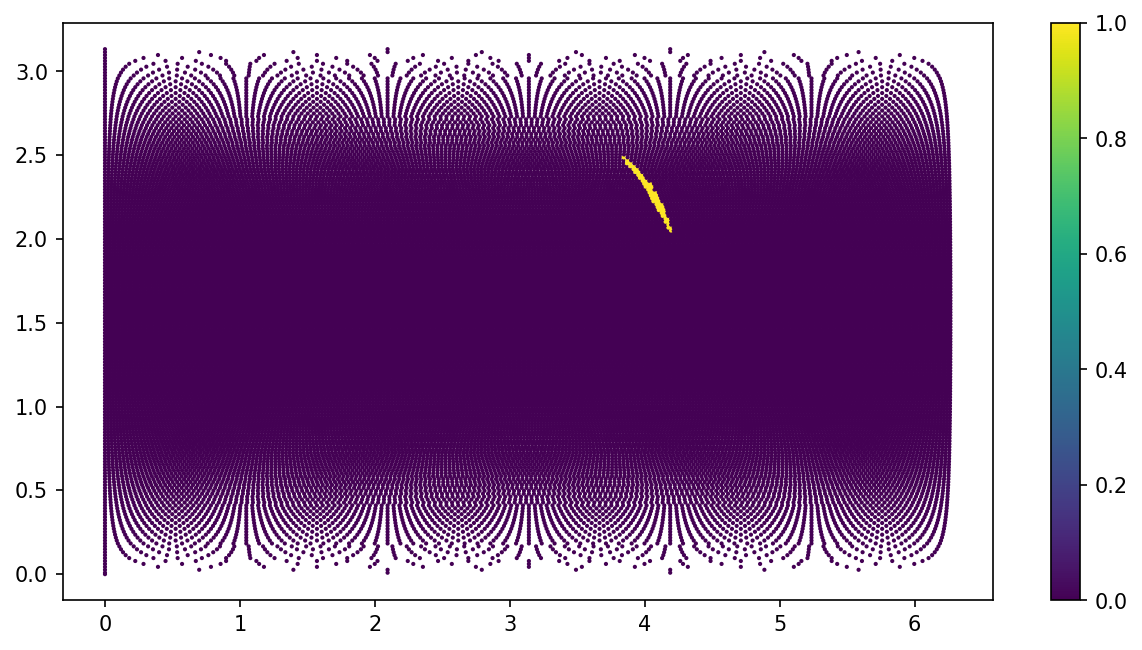

In [610]:
# both methods in one function

loc, chisq = estimate_localisation(sat_xyz, sat_pointings, grb_vector, grb_flux, area_element = square_deg_per_point)

plt.figure(figsize = (10,5), dpi = 150)
plt.scatter(phi, theta, s = 1, c = chisq < 2.3)
plt.colorbar()
# plt.scatter(*grb_coords[::-1], color = 'r', marker = 'x')
plt.show()

In [612]:
# profiling

import time

tstart = time.time()
trials = 1_000

for j in range(trials):

    chisq =  estimate_localisation(sat_xyz, sat_pointings, grb_vector, grb_flux, area_element = square_deg_per_point)

tend = time.time()

runtime_per_loop = (tend-tstart)/trials

print(f'Average runtime per iteration = {runtime_per_loop / 1e-3} ms\n\n')

%load_ext line_profiler

%lprun -f estimate_localisation estimate_localisation(sat_xyz, sat_pointings, grb_vector, grb_flux, area_element = square_deg_per_point)

Average runtime per iteration = 0.8668069839477539 ms


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.001556 s
File: /var/folders/m3/rdjzfhq93lv52ybt6y7584xm0000gn/T/ipykernel_89214/2398545704.py
Function: estimate_localisation at line 126

Line #      Hits         Time  Per Hit   % Time  Line Contents
   126                                           def estimate_localisation(sat_xyz, sat_pointings, grb_vector, grb_flux, area_element):
   127                                               '''
   128                                               Compute the localisation region for a set of satellites
   129                                               
   130                                               >>> IT IS ASSUMED ALL SATELLITES PASSED TO THIS FUNCTION DETECT THE GRB <<<
   131                                           
   132                                               If the above is not true, FOV logic will break down
   133                                               '''
   134                                           
   135         1